In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statannot import add_stat_annotation

# define style for figures
sns.set_theme()
sns.set_style("white")
sns.set_context("notebook")
sns.set_palette("Paired")

In [2]:
# Read in training data
current_directory = os.getcwd()

# data to read in: SN, BN
data = []

# participants
participants = ('SN001', 'SN002', 'SN003', 'SN004', 'SN005', 'SN006', 'SN007', 'SN008', 'SN009', 'SN010', 'SN012', 'SN013', 'SN014', 'SN015', 'SN016', 'SN017', 'SN018', 'SN019', 'SN020', 'SN021')

SN=0
for p in participants:
    SN = SN+1
    root_subject = os.path.join('data', p)
    control_folders = [f.path for f in os.scandir(root_subject) if f.is_dir() and f.name.startswith('control')]
    BN = 0
    for b in control_folders:
        fb = []
        # uncommnent if you read in everything
        BN = BN+1
        if os.path.isfile(os.path.join(b, 'trials.csv')):
            data_temp = pd.read_csv(os.path.join(b, 'trials.csv'),)
            data_temp.insert(0,'BN', BN)
            data_temp.insert(0,'SN',SN)
            # data_row = [SN, BN, data_temp]
            # data.append(data_row)
            data.append(data_temp)            # pd.concat([data, data_row])
            # print(control_folders)

merged_df = pd.concat(data, ignore_index=True)  

control_type_mapping = {0: 'Joystick', 1: 'Myoelectric'}
merged_df['emg'] = merged_df['emg'].map(control_type_mapping)

control_type_mapping = {0: 'Female', 1: 'Male'}
merged_df['gender'] = merged_df['gender'].map(control_type_mapping)

merged_df
pd.set_option('display.max_rows', None)                     
# print(merged_df)


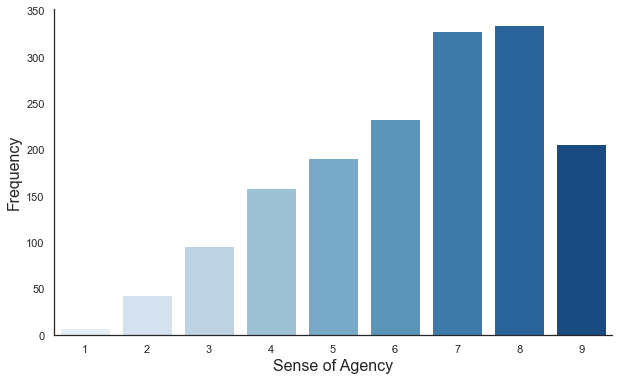

In [3]:
frequency_table = merged_df['soa'].value_counts().reset_index()
frequency_table.columns = ['soa', 'frequency']

plt.figure(figsize=(10, 6))
sns.barplot(x="soa", y='frequency', data=frequency_table, palette='Blues')
plt.xlabel('Sense of Agency', fontsize=16) 
plt.ylabel("Frequency", fontsize=16) 
sns.despine()

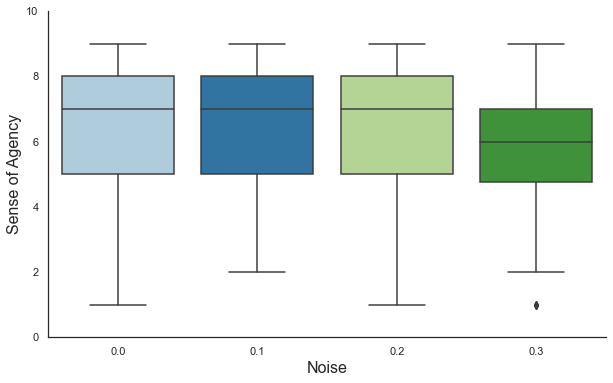

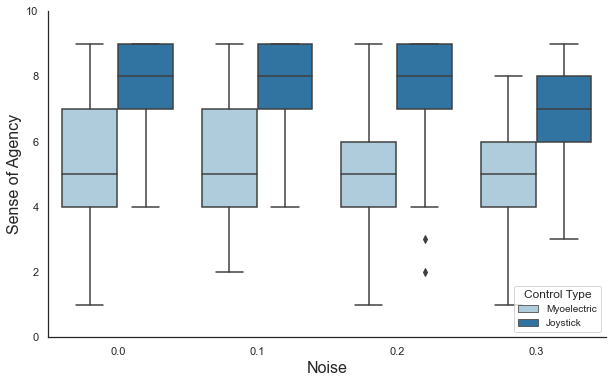

In [4]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=merged_df, x="noise", y="soa")
# plt.title(f'SOA vs Noise')
plt.xlabel('Noise', fontsize=16)
plt.ylabel('Sense of Agency', fontsize=16)
plt.ylim((0,10))
sns.despine()

plt.figure(figsize=(10, 6))
sns.boxplot(data=merged_df, x="noise", y="soa", hue="emg")
# plt.title(f'SOA vs Noise seperated by control type')
plt.xlabel('Noise', fontsize=16)
plt.ylabel('Sense of Agency', fontsize=16)
plt.legend(title='Control Type', title_fontsize=12, fontsize=10)
plt.ylim((0,10))
sns.despine()

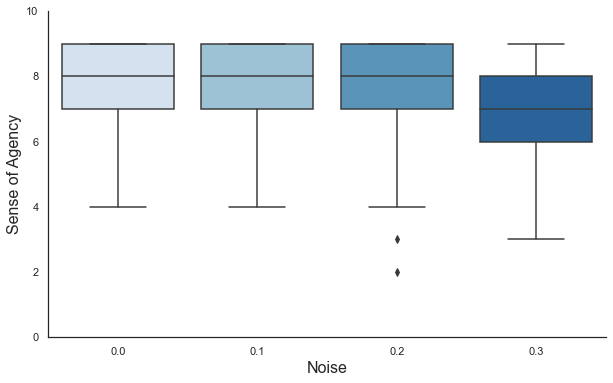

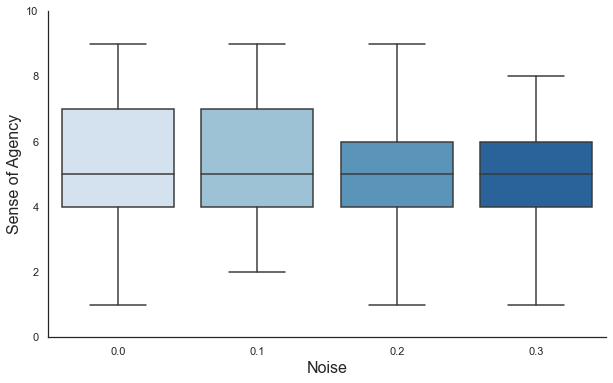

In [5]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=merged_df[merged_df["emg"]=='Joystick'], x="noise", y="soa", palette='Blues')
# plt.title(f'Joystick SOA vs Noise')
plt.xlabel('Noise', fontsize=16)
plt.ylabel('Sense of Agency', fontsize=16)
plt.ylim((0,10))
sns.despine()

plt.figure(figsize=(10, 6))
sns.boxplot(data=merged_df[merged_df["emg"]=='Myoelectric'], x="noise", y="soa", palette='Blues')
# plt.title(f'EMG SOA vs Noise')
plt.xlabel('Noise', fontsize=16)
plt.ylabel('Sense of Agency', fontsize=16)
plt.ylim((0,10))
sns.despine()

In [6]:
# plt.figure(figsize=(10, 6))
# sns.boxplot(data=merged_df[merged_df["emg"]==0], x="noise", y="soa", hue="SN")
# plt.title(f'Joystick SOA vs Noise seperated by participant')
# plt.xlabel('Noise')
# plt.ylabel('Sense of Agency')
# plt.ylim((0,10))
# sns.despine()


# plt.figure(figsize=(10, 6))
# sns.boxplot(data=merged_df[merged_df["emg"]==1], x="noise", y="soa", hue="SN")
# plt.title(f'EMG SOA vs Noise seperated by participant')
# plt.xlabel('Noise')
# plt.ylabel('Sense of Agency')
# plt.ylim((0,10))
# sns.despine()

c:\Users\Sarah\anaconda3\lib\site-packages\seaborn\axisgrid.py:670: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


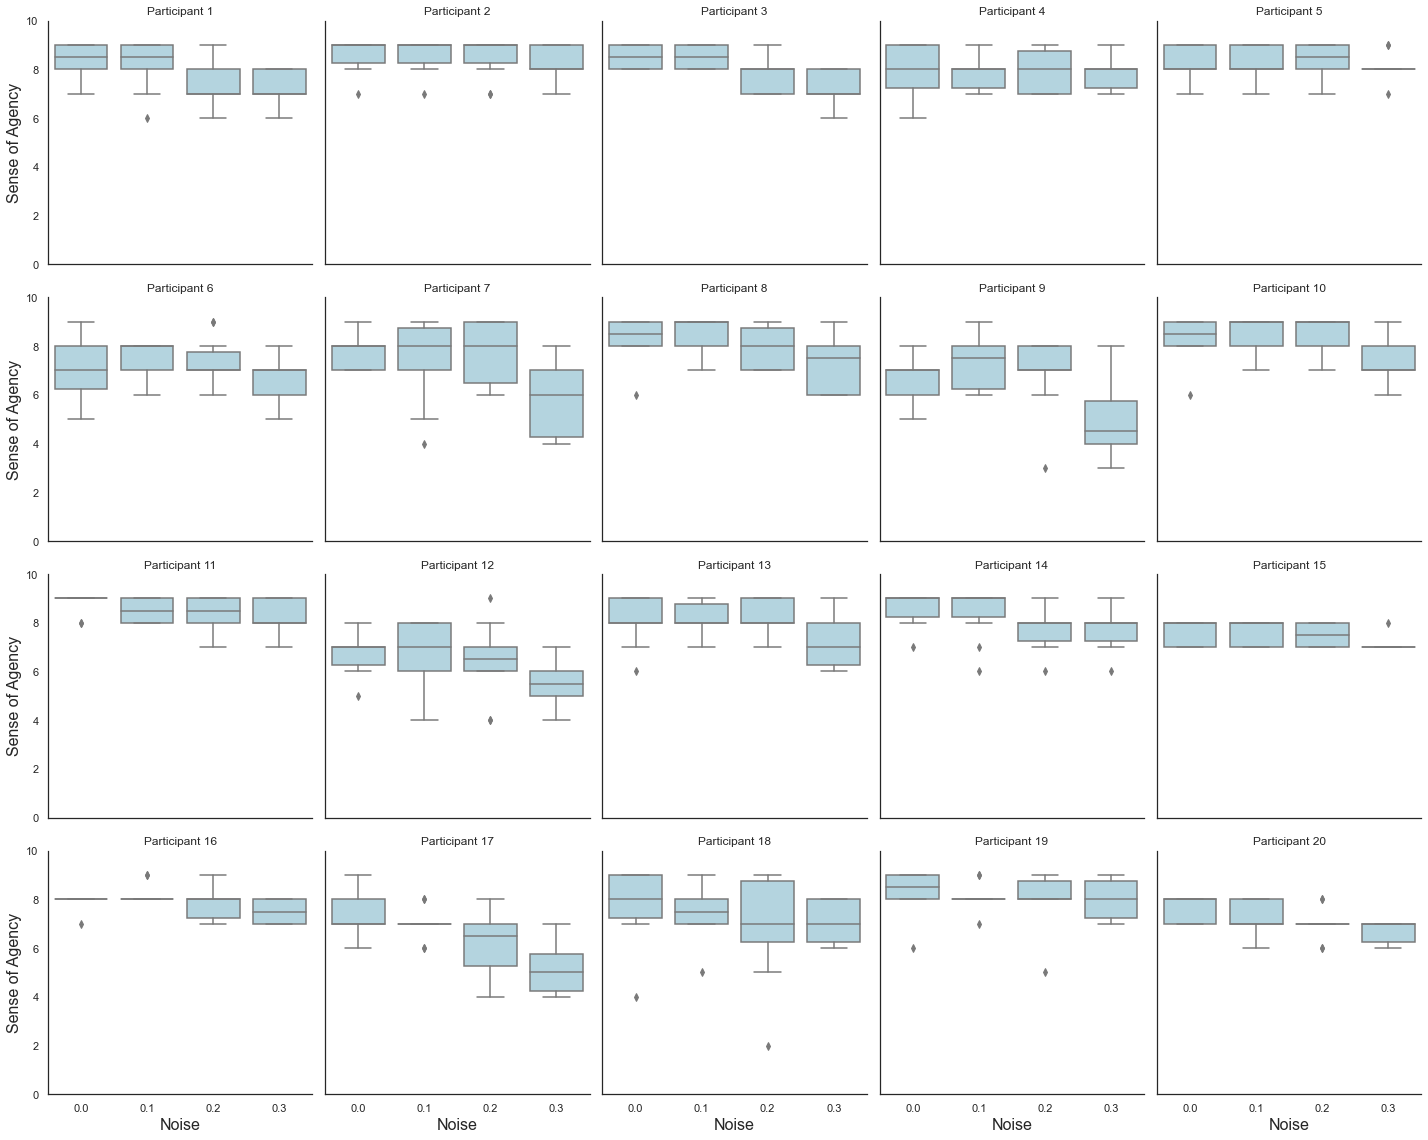

In [7]:
stickplot = sns.FacetGrid(merged_df[merged_df["emg"]=='Joystick'], col="SN", col_wrap=5, height=4)
stickplot.map(sns.boxplot, "noise", "soa", color='lightblue')

stickplot.set_titles("Participant {col_name}")
stickplot.set_axis_labels("Noise", "Sense of Agency", fontsize=16)
stickplot.set(ylim=(0, 10))
plt.tight_layout()


c:\Users\Sarah\anaconda3\lib\site-packages\seaborn\axisgrid.py:670: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


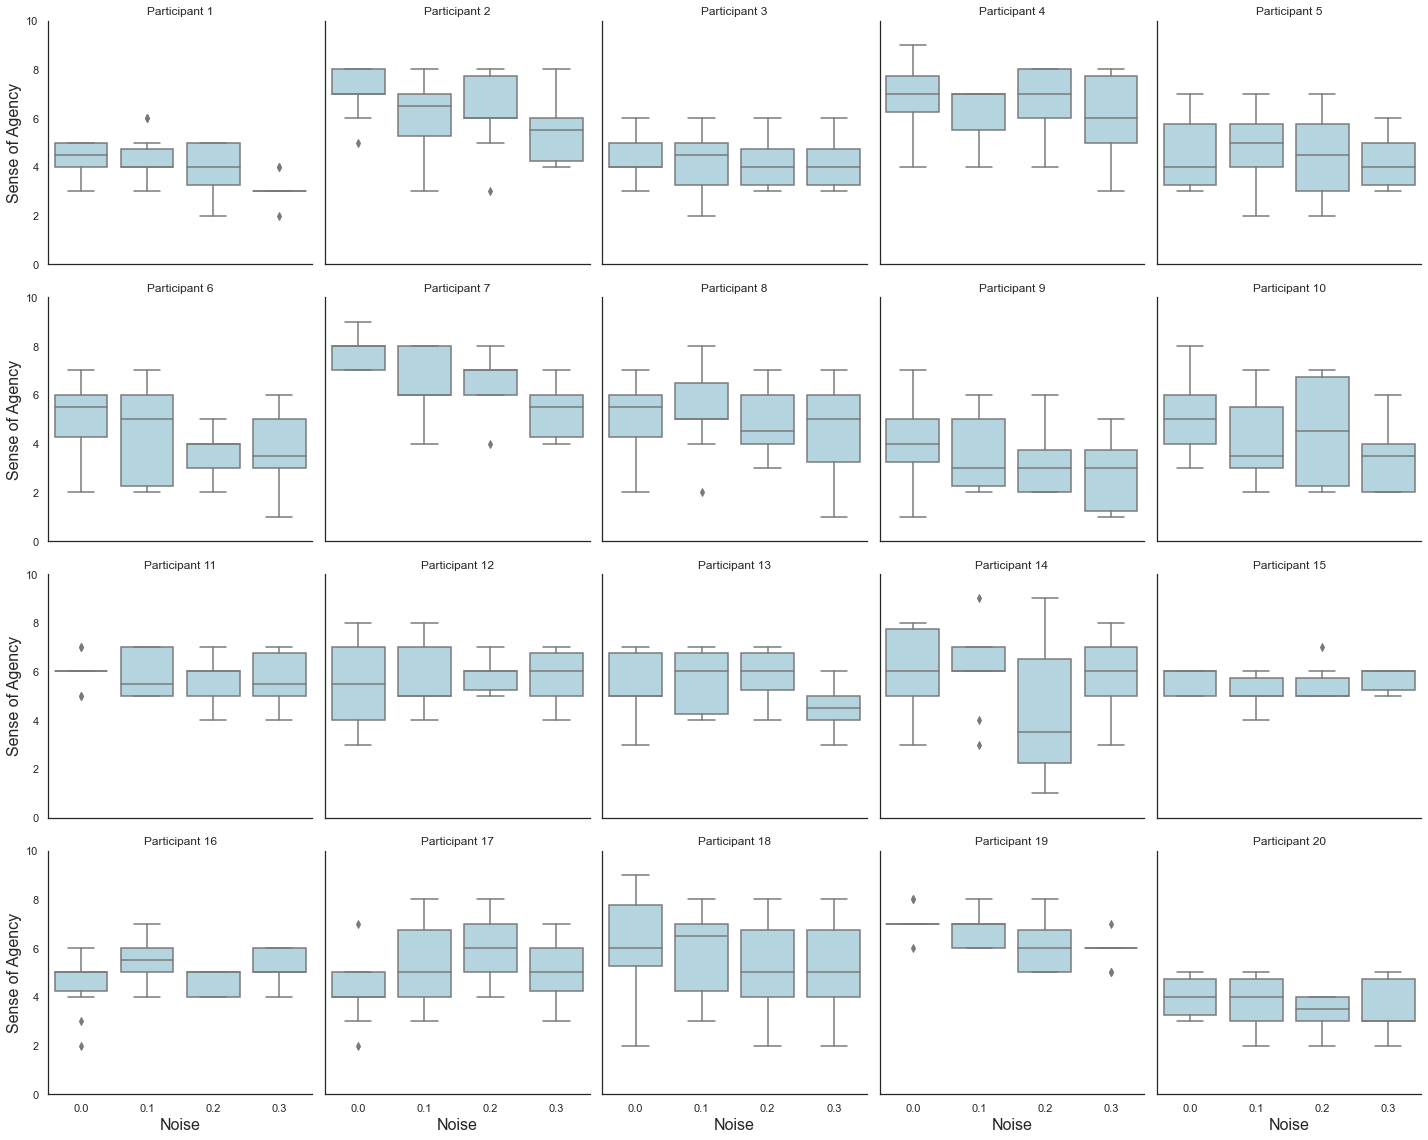

In [8]:
emgplot = sns.FacetGrid(merged_df[merged_df["emg"]=='Myoelectric'], col="SN", col_wrap=5, height=4)
emgplot.map(sns.boxplot, "noise", "soa", color='lightblue')

emgplot.set_titles("Participant {col_name}")
emgplot.set_axis_labels("Noise", "Sense of Agency", fontsize=16)
emgplot.set(ylim=(0, 10))
plt.tight_layout()

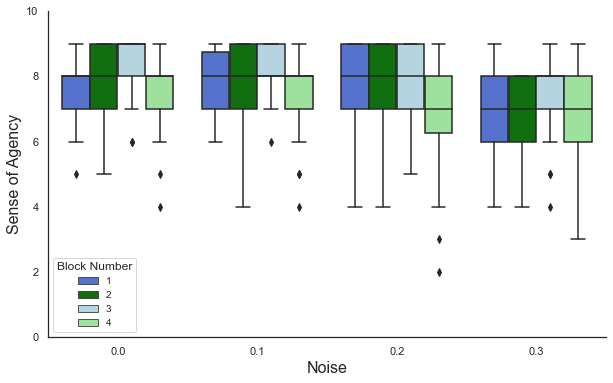

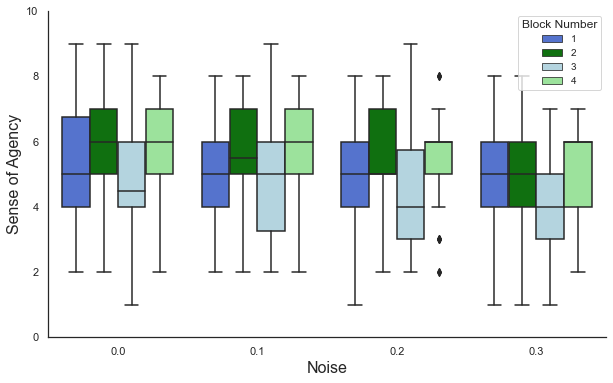

In [9]:
merged_df["BN"] = merged_df["BN"].astype(str)

plt.figure(figsize=(10, 6))
sns.boxplot(data=merged_df[merged_df["emg"]=='Joystick'], x="noise", y="soa", hue="BN", palette={"1": "royalblue", "2": "green", "3": "lightblue", "4": "lightgreen"}, hue_order=["1", "2", "3", "4"])
# plt.title(f'Joystick SOA vs Noise')
plt.legend(title='Block Number', title_fontsize=12, fontsize=10)
plt.xlabel('Noise', fontsize=16)
plt.ylabel('Sense of Agency', fontsize=16)
plt.ylim((0,10))
sns.despine()

plt.figure(figsize=(10, 6))
sns.boxplot(data=merged_df[merged_df["emg"]=='Myoelectric'], x="noise", y="soa", hue="BN", palette={"1": "royalblue", "2": "green", "3": "lightblue", "4": "lightgreen"}, hue_order=["1", "2", "3", "4"])
# plt.title(f'EMG SOA vs Noise')
plt.legend(title='Block Number', title_fontsize=12, fontsize=10)
plt.xlabel('Noise', fontsize=16)
plt.ylabel('Sense of Agency', fontsize=16)
plt.ylim((0,10))
sns.despine()

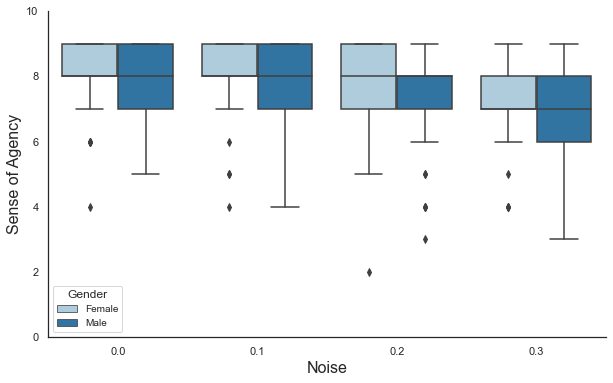

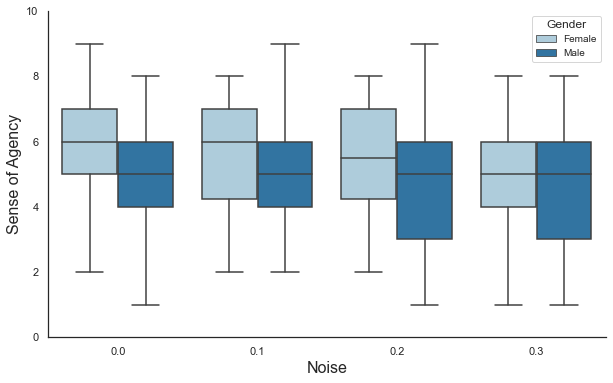

In [10]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=merged_df[merged_df["emg"]=='Joystick'], x="noise", y="soa", hue="gender")
# plt.title(f'Joystick SOA vs Noise')
plt.legend(title='Gender', title_fontsize=12, fontsize=10)
plt.xlabel('Noise', fontsize=16)
plt.ylabel('Sense of Agency', fontsize=16)
plt.ylim((0,10))
sns.despine()

plt.figure(figsize=(10, 6))
sns.boxplot(data=merged_df[merged_df["emg"]=='Myoelectric'], x="noise", y="soa", hue="gender")
# plt.title(f'EMG SOA vs Noise')
plt.legend(title='Gender', title_fontsize=12, fontsize=10)
plt.xlabel('Noise', fontsize=16)
plt.ylabel('Sense of Agency', fontsize=16)
plt.ylim((0,10))
sns.despine()

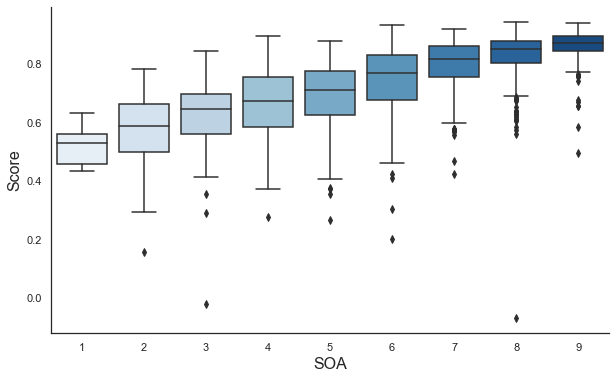

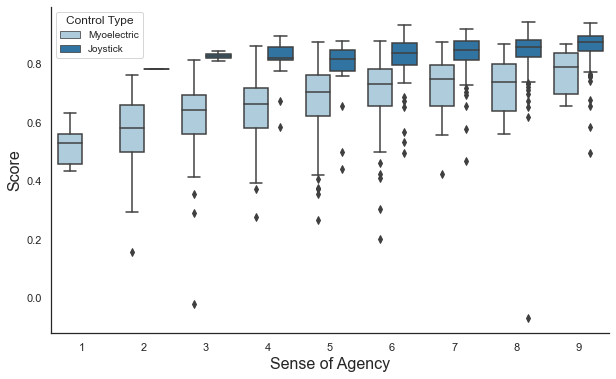

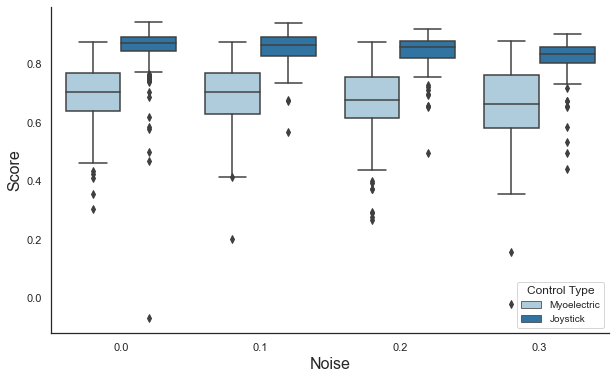

In [11]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=merged_df, x="soa", y="score", palette="Blues")
# plt.title(f'Score vs SOA')
plt.ylabel('Score', fontsize=16)
plt.xlabel('SOA', fontsize=16)
sns.despine()

plt.figure(figsize=(10, 6))
sns.boxplot(data=merged_df, x="soa", y="score", hue="emg")
# plt.title(f'Score vs SOA')
plt.legend(title='Control Type', title_fontsize=12, fontsize=10)
plt.ylabel('Score', fontsize=16)
plt.xlabel('Sense of Agency', fontsize=16)
sns.despine()

plt.figure(figsize=(10, 6))
sns.boxplot(data=merged_df, x="noise", y="score", hue="emg")
plt.legend(title='Control Type', title_fontsize=12, fontsize=10)
plt.ylabel('Score', fontsize=16)
plt.xlabel('Noise', fontsize=16)
sns.despine()
